In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Homework 10: Designing Experiments

## References

* [Why the Mean Matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-sp24/resources/quick-reference.html)

---

## Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your Tasks are categorized as auto-graded (📍) and manually graded (📍🔎).
    - For all the auto-graded tasks:
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to run some tests on your code.
        - Keep in mind that for homework and project assignments, sometimes there are hidden tests that you will not be able to see the results of that we use for scoring the correctness of your response. **Passing the auto-grader does not guarantee that your answer is correct.**
    - For all the manually graded tasks:
        - You might need to provide your own response to the provided prompt. Do so by replacing the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or something else using code. Do so by replacing the `...` in the code cell to generate the image, table, etc.
        - In either case, review the rubric on the associated <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page to understand the scoring criteria.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [10]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Bounding the Tail of a Distribution

---

A community has an average age of 45 years with a standard deviation of 5 years.

In each task in this section, fill in the blank with a percent that makes the statement true **without further assumptions**, and explain your answer.

*Note:* No credit will be given for loose bounds such as "at least 0%" or "at most 100%". Give the best answer that is possible with the information given.

---

### Task 01 📍🔎

<!-- BEGIN QUESTION -->

At least _______% of the people are between 25 and 65 years old.

_Points:_ 2

To figure out what percentage of people are between 25 and 65, we need to find how many standard deviations these ages are from the mean age of 45. The standard deviation is 5 years, so 25 and 65 are each 4 standard deviations from the mean. Chebyshev’s inequality shows that at least 1 - 1/k^2 of the data lies within k standard deviations; with k=4, this means that at least 1 - 1/16, or 93.75% of the data. Therefore, at least 93.75% of the community is aged between 25 and 65 years.

<!-- END QUESTION -->

---

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

At most _______% of the people have ages that are not in the range 25 years to 65 years.

_Points:_ 2

100% - 93.75% = 6.25%. At most 6.25% of the people have ages that are not in the range of 25 years to 65 years.

<!-- END QUESTION -->

---

## Sample Size and Confidence Level

---

A data science class at the large Data 8 University wants to estimate the percentage of Facebook users among students at the school. To do this, they need to take a random sample of students. You can assume that their method of sampling is equivalent to drawing at random with replacement from students at the school.

***Please review [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook before proceeding with this section. Your work will go much faster that way!***

---

### Task 03 📍

Assign `smallest` to the smallest number of students (an integer value) they should sample to ensure that a **95%** confidence interval for the parameter has a width of no more than 6% from the left end to the right end.

*Hint:* How can our data be represented to show if a student in the sample is a Facebook user? Given this, what assumptions can we make for the SD of the population? [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) might be helpful!

*Note:* You can use `np.ceil` to round a float up to the next whole number. Keep in mind that the resulting value will still be a `float` data type. You'll need to convert the float to an integer.

_Points:_ 2

In [21]:
smallest = (4 * 0.5 / 0.06) ** 2  

smallest = int(np.ceil(smallest))

smallest

1112

In [22]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ smallest represents a value between 110 and 1150, inclusive.
task_03 - 2 message: ✅ smallest is an integer.

---

### Task 04 📍🔎

<!-- BEGIN QUESTION -->

Suppose the data science class decides to construct a 90% confidence interval instead of a 95% confidence interval, but they still require that the width of the interval is no more than 6% from the left end to the right end. Will they need the same sample size as in Task 03? Pick the right answer and explain further without calculation.

1. Yes, they must use the same sample size.
2. No, a smaller sample size will work.
3. No, they will need a bigger sample.


_Points:_ 2

No, a smaller sample size will work. Constructing a 90% confidence interval requires a lower confidence level than a 95% interval, which leads to a smaller margin of error. This means that fewer students need to be sampled to achieve the same 6% interval width. Consequently, a smaller sample size will suffice for a 90% confidence interval compared to the 95% case.

<!-- END QUESTION -->

---

### Task 05 📍

The professor tells the class that a 90% confidence interval for the parameter is constructed exactly like a 95% confidence interval, except that you have to go only 1.65 SDs on either side of the estimate (±1.65) instead of 2 SDs on either side (±2). Assign `smallest_num` to the smallest number of students (an integer) they should sample to ensure that a **90%** confidence interval for the parameter has a width of no more than 6% from the left end to the right end.

*Note:* Make sure you round up your sample size value and make sure it is an integer.


_Points:_ 2

In [29]:
# Given values for calculating the sample size for a 90% confidence interval
Z = 1.65  # Z-value for a 90% confidence interval (±1.65 SDs)
SD = 0.5  # Maximum standard deviation for a proportion (conservative estimate)
E = 0.03  # Margin of error (half of the total width of 6%)

# Calculate the sample size using the formula n = (Z * SD / E) ** 2
n = (Z * SD / E) ** 2

smallest_num = int(n) 

# Display the result
smallest_num


756

In [30]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ smallest_num represents a value between 700 and 800, inclusive.
task_05 - 2 message: ✅ smallest_num is an integer.

---

For this next exercise, please consult [Section 14.3.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf) of the textbook for similar examples.

The students are curious about how the professor came up with the value 1.65 in Task 05. She says she ran the following two code cells. The first one calls the `datascience` library function `plot_normal_cdf`, which displays the proportion that is at most the specified number of SDs above average under the normal curve plotted with standard units on the horizontal axis. You can find the documentation [here](http://data8.org/datascience/util.html#datascience.util.plot_normal_cdf).

*Note:* The acronym `cdf` stands for `cumulative distribution function`. It measures the proportion to the left of a specified point under a probability histogram.

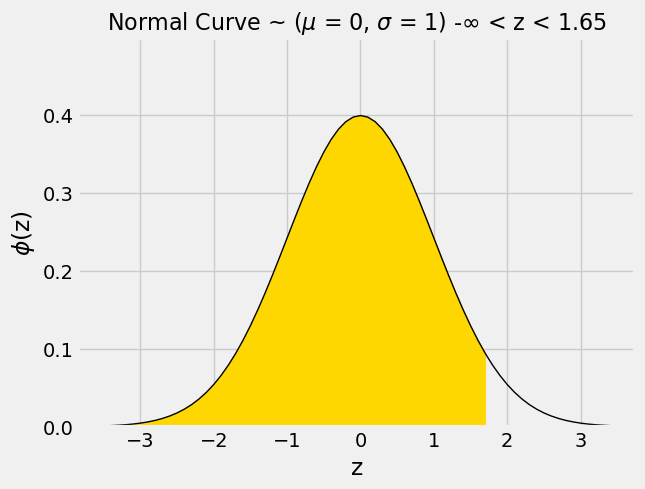

In [31]:
plot_normal_cdf(1.65)

To run the second cell, the professor had to first import a Python library for probability and statistics:

In [32]:
# Just run this cell
from scipy import stats

Then she used the `norm.cdf` method in the library to find the gold proportion above.

In [33]:
# Just run this cell
stats.norm.cdf(1.65)

0.9505285319663519

*Note*: You do not need to understand how the `scipy` library or how to use the method yourself.

---

### Task 06 📍

This shows that the percentage in a normal distribution that is at most 1.65 SDs above average is about 95%. Why is 1.65 the right number of SDs to use when constructing a 90% confidence interval? 

Assign `why_165` to the integer `1, 2, 3, 4` that is associated with the statement below that best answers this question.

1. 1.65 is the number of SDs needed to ensure that the area to the left of the interval is exactly 10%.
2. The area between -1.65 and 1.65 SDs includes 90% of the data, leaving 5% on each side outside this range, creating a total of 90% within the confidence interval.
3. A 90% confidence interval requires the data to extend 1.65 SDs above the average to include the upper 95% of the distribution.
4. The area to the right of -1.65 SDs contains 95% of the distribution, so 1.65 SDs is used for a 90% confidence interval.

_Points:_ 2

In [34]:
why_165 = 2
why_165

2

In [35]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ why_165 represents 1, 2, 3, or 4.

---

### Task 07 📍

Run the following cell to see that the proportion that is at most 2.33 SDs above average in a normal distribution is 99%.

In [36]:
# Just run this cell, do not change it.
stats.norm.cdf(2.33)

0.99009692444083575

With this in mind, assign `option` to the right option `1, 2, 3, 4` to fill in the blank in the following statement:

If you start at the estimate and go 2.33 SDs on either side, then you will get a _______% confidence interval for the parameter.

1. 98
2. 98.5
3. 99
4. 99.5



_Points:_ 2

In [37]:
option = 3
option

3

In [38]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ option represents 1, 2, 3, or 4.

---

---

## Polling and the Normal Distribution

Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal and vertical axes) called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. We have provided a table for you below which has 3 columns: the first two columns are identical to `sample`. The third column contains the proportion of total voters that chose each option.

In [39]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))

sample_size = sum(sample.column("Count"))
sample_with_proportions = sample.with_column("Proportion", sample.column("Count") / sample_size)
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


---

### Task 08 📍

Michelle wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  

Fill in the next cell to simulate an empirical distribution of Yes proportions. Use bootstrap resampling to simulate 10,000 election outcomes, and assign `resample_yes_proportions` to contain the Yes proportion of each bootstrap resample. Then, visualize `resample_yes_proportions` with a histogram. **You should see a bell-shaped curve centered near the proportion of Yes in the original sample.**

*Hint:* `sample_proportions` may be useful here!


_Points:_ 2

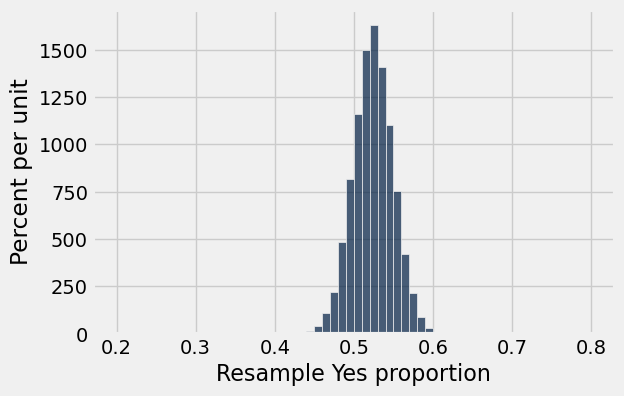

In [56]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(sample_size, sample_with_proportions.column("Proportion"))
    resample_yes_proportions = np.append(resample_yes_proportions,resample.item(0))
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [57]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ resample_yes_proportions contains 10,000 items.
task_08 - 2 message: ✅ The mean and standard deviation of resample_yes_proportions seems possible.

---

<!-- BEGIN QUESTION -->

### Task 09 📍🔎

Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above?


_Points:_ 2

The Central Limit Theorem is applicable because Michelle’s 10,000 resamples, each with 400 observations, make the sample proportions approximate a normal distribution. The theorem says that as the sample size becomes larger, the sampling distribution of the sample proportion approaches normality, regardless of the population distribution. This results in the resample_yes_proportions histogram being bell-shaped and centered at 0.525. The standard error measures how much these sample proportions are expected to vary due to sampling. The CLT justifies using this approximate normal distribution to create confidence intervals for estimating the true proportion.

<!-- END QUESTION -->

In a population whose members are 0 and 1, there is a simple formula for the **standard deviation of that population**:

$$\text{standard deviation of population} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

---

### Task 10 📍

 Using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, *algebraically* compute the predicted standard deviation of the `resample_yes_proportions` array. Assign this number to `approximate_sd`. **Do not access the data in `resample_yes_proportions` in any way.**

Remember that the standard deviation of the sample means can be computed from the population SD and the size of the sample (the formula above might be helpful). If we do not know the population SD, we can use the sample SD as a reasonable approximation in its place. [This section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means) of the textbook also may be helpful.


_Points:_ 2

In [62]:
p = 210 / 400  
sample_size = 400

approx_pop_sd = (p * (1 - p)) ** 0.5
approximate_sd = approx_pop_sd / (sample_size ** 0.5)
approximate_sd

0.024968730444297725

In [63]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ approximate_sd is less than 0.025.

---

### Task 11 📍

Compute the standard deviation of the array `resample_yes_proportions`, which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to Task 10 is approximately correct.


_Points:_ 2

In [64]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.02507874897198822

In [65]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ exact_sd is less than 0.05

---

### Task 12 📍

**Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs correspond to 95% of the distribution promised by the CLT? Recall the discussion in the textbook [here](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

*Hint:* The `approximate_sd` variable you previously defined may be helpful!


_Points:_ 3

In [68]:
mean_proportion = 0.525  
z_value = 1.96  

lower_limit = mean_proportion - z_value * approximate_sd
upper_limit = mean_proportion + z_value * approximate_sd
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.4760612883291765 upper: 0.5739387116708236


In [69]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ The lower_limit and upper_limit values seem possible.

---

Run the following cell to plot your confidence interval.

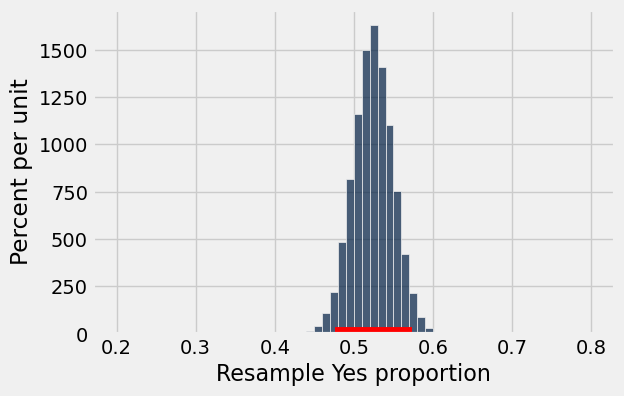

In [70]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

---

### Task 13 📍

Does Michelle's sample size achieve the desired standard deviation of sample means? What SD would you achieve with a smaller sample size? A higher sample size?

To explore this, first compute the SD of sample means obtained by using Michelle's sample size.

_Points:_ 4

In [71]:
estimated_population_sd = approx_pop_sd
michelle_sample_size = 9975
michelle_sample_mean_sd = estimated_population_sd / (michelle_sample_size ** 0.5)
print("With Michelle's sample size, you would predict a sample mean SD of %f." % michelle_sample_mean_sd)

With Michelle's sample size, you would predict a sample mean SD of 0.005000.


In [72]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅

---

### Task 14 📍

Next, compute the SD of the sample means that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Michelle's will do.*


_Points:_ 2

In [73]:
smaller_sample_size = 5000
smaller_sample_mean_sd = estimated_population_sd / (smaller_sample_size ** 0.5)
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)

With this smaller sample size, you would predict a sample mean SD of 0.007062


In [74]:
grader.check("task_14")

task_14 results: All test cases passed!
task_14 - 1 message: ✅ smaller_sample_size is less than michelle_sample_size.

---

### Task 15 📍

Finally, compute the SD of the sample means that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Michelle's will do.

_Points:_ 2

In [75]:
larger_sample_size = 15000
larger_sample_mean_sd = estimated_population_sd / (larger_sample_size ** 0.5)
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)

With this larger sample size, you would predict a sample mean SD of 0.004077


In [76]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ larger_sample_size is greater than michelle_sample_size.

---

### Task 16 📍

Based on this, was Michelle's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if 9,975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't.


_Points:_ 2

In [77]:
min_sufficient = michelle_sample_mean_sd <= 0.005
min_sufficient

True

In [78]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ min_sufficient is a Boolean value.

---

## Submit Your Assignment to Canvas

Follow these steps to submit your homework assignment:

1. **Review the Rubric:** View the rubric on the associated Canvas Assignment page to understand the scoring criteria.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download IPYNB` to download the notebook (`.ipynb`) file.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.ipynb` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [79]:
grader.check_all()

task_03 results: All test cases passed!
task_03 - 1 message: ✅ smallest represents a value between 110 and 1150, inclusive.
task_03 - 2 message: ✅ smallest is an integer.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ smallest_num represents a value between 700 and 800, inclusive.
task_05 - 2 message: ✅ smallest_num is an integer.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ why_165 represents 1, 2, 3, or 4.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ option represents 1, 2, 3, or 4.

task_08 results: All test cases passed!
task_08 - 1 message: ✅ resample_yes_proportions contains 10,000 items.
task_08 - 2 message: ✅ The mean and standard deviation of resample_yes_proportions seems possible.

task_10 results: All test cases passed!
task_10 - 1 message: ✅ approximate_sd is less than 0.025.

task_11 results: All test cases passed!
task_11 - 1 message: ✅ exact_sd is less than 0.05

task_12 results: All test cases passed!
task_12 - 1 m